In [1]:
import torch

# Check if GPU is available≠
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of each GPU
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")

    # Get the current GPU device
    current_device = torch.cuda.current_device()
    print(f"Current GPU device: {current_device}")

    # Get GPU properties
    gpu_properties = torch.cuda.get_device_properties(current_device)
    print(f"GPU Properties:\n{gpu_properties}")
else:
    print("No GPU available. Switching to CPU.")

Number of available GPUs: 1
GPU 0: Tesla P100-PCIE-16GB
Current GPU device: 0
GPU Properties:
_CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16276MB, multi_processor_count=56)


In [2]:
import torch
from torch import nn
from torchvision.transforms import ToTensor

# Task 1

## A

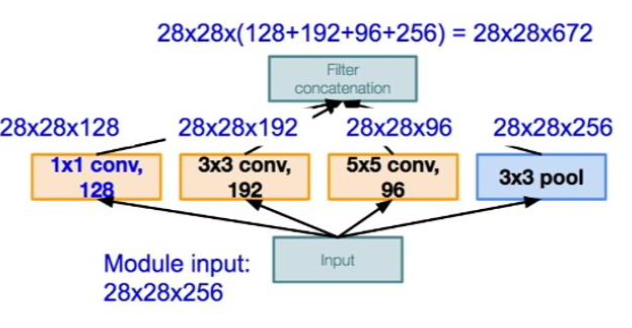

In [3]:
import torch
import torch.nn as nn

class task_A_module(nn.Module):
    def __init__(self):
        super(task_A_module, self).__init__()
        
        self.conv1x1 = nn.Conv2d(256, 128, kernel_size=1)
        self.conv3x3 = nn.Conv2d(256, 192, kernel_size=3, padding=1)
        self.conv5x5 = nn.Conv2d(256, 96, kernel_size=5, padding=2)
        self.pool3x3 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        # Applying ReLU activation directly
        x1 = nn.ReLU()(self.conv1x1(x))
        x2 = nn.ReLU()(self.conv3x3(x))
        x3 = nn.ReLU()(self.conv5x5(x))
        
        # Applying a convolutional layer after max pooling is a common practice 
        # to avoid having to concatenate features maps of different sizes.
        pooled_x = self.pool3x3(x)
        
        # Concatenating along the feature dimension (dim=1 for batched input).
        out = torch.cat((x1, x2, x3, pooled_x), dim=1) 
        
        return out

# Testing with a random tensor with shape [batch_size:10 , channels:256 , height:28 , width:28]
input_tensor = torch.randn(10, 256, 28, 28) 
model = task_A_module()
output_tensor = model(input_tensor)


print(model)

print(output_tensor.shape)  


task_A_module(
  (conv1x1): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (conv3x3): Conv2d(256, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5x5): Conv2d(256, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool3x3): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
)
torch.Size([10, 672, 28, 28])


---------------------------

## B

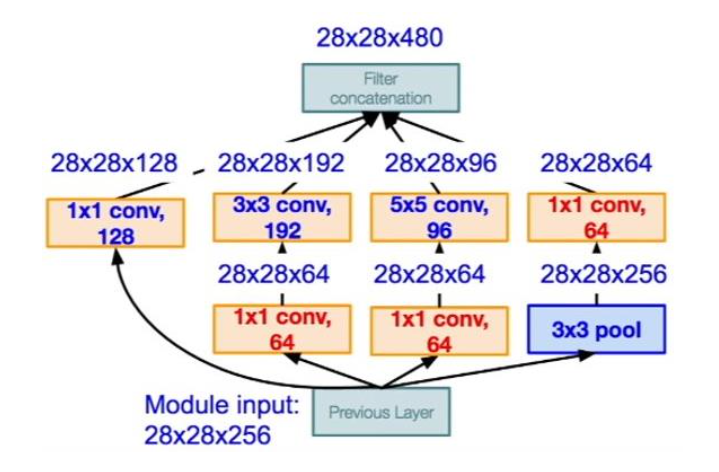

In [4]:
import torch
import torch.nn as nn

class task_B_module(nn.Module):
    def __init__(self, in_channels):
        super(task_B_module, self).__init__()
        
        self.branch1 = nn.Conv2d(in_channels, 128, kernel_size=1)
        
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, 192, kernel_size=1),
            nn.ReLU(),  # Apply ReLU activation after the first convolution in branch2
            nn.Conv2d(192, 192, kernel_size=3, padding=1)
        )
        
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, 96, kernel_size=1),
            nn.ReLU(),  # Apply ReLU activation after the first convolution in branch3
            nn.Conv2d(96, 96, kernel_size=5, padding=2)
        )
        
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, 64, kernel_size=1)
        )

    def forward(self, x):
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch4_out = self.branch4(x)

        # Concatenating the output of each branch
        outputs = [branch4_out, branch3_out, branch2_out, branch1_out]
        return torch.cat(outputs, dim=1)  # Concatenating along the channel dimension

# Testing with a random input tensor of size (batch size: 10 and number of channels:256 and height & width :28x28 )
x = torch.randn(10, 256, 28, 28) 
model = task_B_module(256) 
output = model(x)

print(model)
print(output.shape)  


task_B_module(
  (branch1): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (branch2): Sequential(
    (0): Conv2d(256, 192, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (branch3): Sequential(
    (0): Conv2d(256, 96, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(96, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  )
  (branch4): Sequential(
    (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
    (1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  )
)
torch.Size([10, 480, 28, 28])


-------------------------------------------

## C

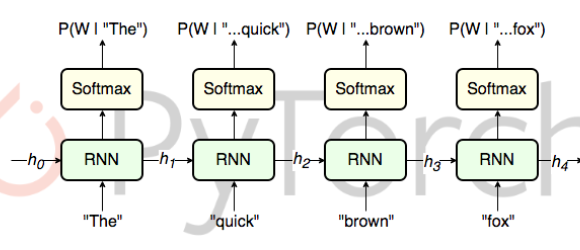

In [5]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, dropout=0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, dropout=dropout)

    def forward(self, input, hidden):
        output, hidden = self.rnn(input, hidden)
        return output, hidden


class Softmax(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, input_size)

    def forward(self, input):
        output = self.linear(input)
        probs = torch.nn.functional.softmax(output, dim=1)
        return probs

# Example usage:
# Convert the input text to word embeddings
input_text = "The quick brown fox"
word_to_index = {word: idx for idx, word in enumerate(input_text.lower().split())}
input_sequence = torch.tensor([[word_to_index[word] for word in input_text.lower().split()]], dtype=torch.float)



input_size = 4     #len(input_text.split(" "))
hidden_layers_size = 4      #len(input_text.split(" "))
num_layers = 2
dropout = 0.2



rnn_module = RNN(input_size, hidden_layers_size, num_layers, dropout)
softmax_module = Softmax(hidden_layers_size)


# Initialize hidden state with correct shape
hidden_layers = torch.zeros(num_layers, hidden_layers_size, dtype=torch.float)


# Pass input through modules:
output, hidden = rnn_module(input_sequence, hidden_layers)
prob = softmax_module(output)



print(prob)


tensor([[0.3997, 0.3638, 0.0901, 0.1464]], grad_fn=<SoftmaxBackward0>)


-----------------------------

---------------------------

# Task 2

## Models And Libraries

In [16]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#all models
model_RESNET101 = models.resnet101(pretrained=True).to(device)
model_VGG16 = models.vgg16(pretrained=True).features.to(device)
model_mobilenet = models.mobilenet_v3_small(pretrained=True).features.to(device)



# Choose an input image for visualization
img_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Bean/0026.jpg'
img = Image.open(img_path).convert('RGB')


# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img)
img_tensor = torch.unsqueeze(img_tensor, 0).to(device)



# function of the feature map of the specified layer
def plot_feature_map(model,img_tensor,idx):
    feature_map_model = torch.nn.Sequential(*list(model.children())[:idx])
    feature_map_model.to(device)
    feature_map = feature_map_model(img_tensor)

    # Visualize the feature map
    plt.imshow(feature_map[0, 0].cpu().detach().numpy(), cmap='viridis')
    plt.show()


## 2 (a)

feature map of the first level features using Resnet-101


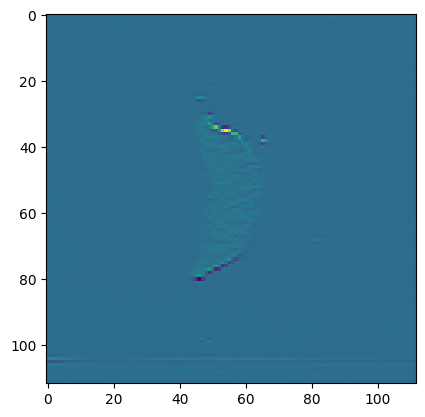

feature map of the first level features using VGG16


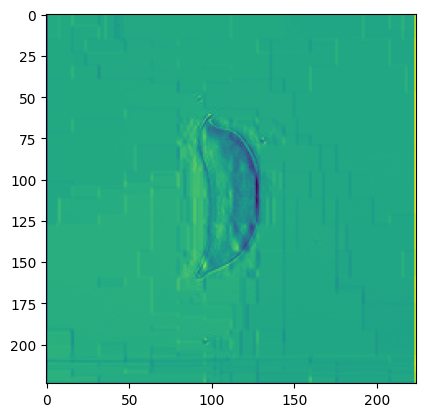

feature map of the first level features using MobilenetV3


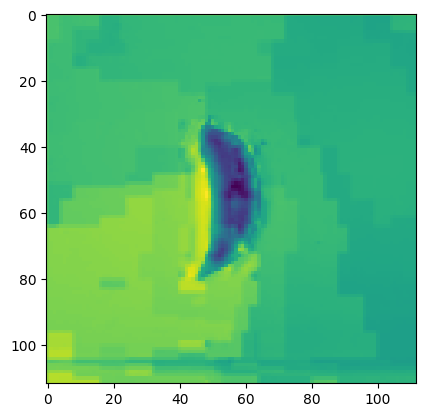

In [22]:
print("feature map of the first level features using Resnet-101")
plot_feature_map(model_RESNET101,img_tensor,1)
print("feature map of the first level features using VGG16")
plot_feature_map(model_VGG16,img_tensor,1)
print("feature map of the first level features using MobilenetV3")
plot_feature_map(model_mobilenet,img_tensor,1)

## 2 (b)

feature map of the final features using Resnet-101


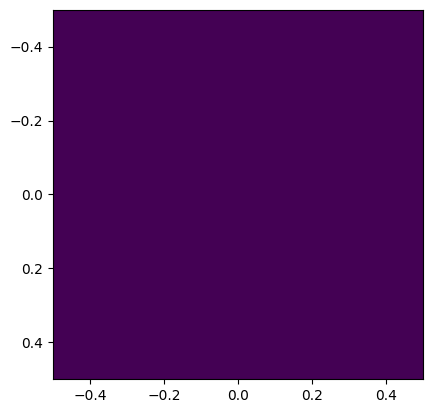

feature map of the final features using VGG16


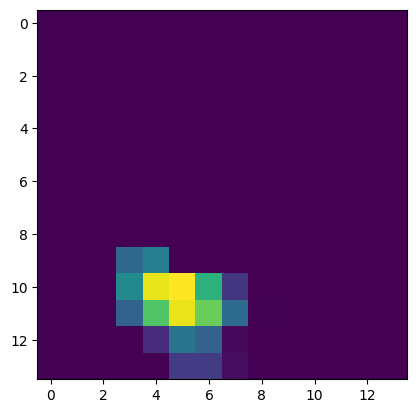

feature map of the final features using MobilenetV3


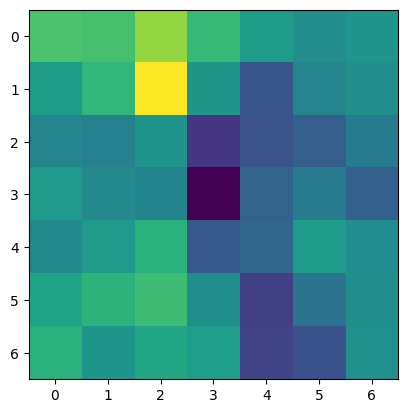

In [23]:
print("feature map of the final features using Resnet-101")
plot_feature_map(model_RESNET101,img_tensor,-1)
print("feature map of the final features using VGG16")
plot_feature_map(model_VGG16,img_tensor,-1)
print("feature map of the final features using MobilenetV3")
plot_feature_map(model_mobilenet,img_tensor,-1)

## 2 (c)

In [2]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from sklearn.neighbors import NearestNeighbors

# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)
model.eval()

# Choose an input image for feature extraction
img_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Bean/0026.jpg'
img = Image.open(img_path).convert('RGB')

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img)
img_tensor = torch.unsqueeze(img_tensor, 0)

# Extract features from the image using the pre-trained model
with torch.no_grad():
    features = model(img_tensor)

# Load the features from the validation set (replace this with your validation set features)
validation_features = torch.load('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')

# Assuming validation_features is a tensor of shape (num_samples, num_features)
# Reshape features to match validation_features if needed
features = features.view(1, -1)

# Find the 5 nearest neighbors using k-NN
k_neighbors = 5
neigh = NearestNeighbors(n_neighbors=k_neighbors)
neigh.fit(validation_features.numpy())

# Find the indices of the nearest neighbors
distances, indices = neigh.kneighbors(features.numpy())

# Output the indices of the 5 nearest neighbors
print("Indices of the 5 nearest neighbors:", indices)


IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'

# Task 3

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformers
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the training and validation datasets
train_dataset = datasets.ImageFolder('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', transform=transform)
valid_dataset = datasets.ImageFolder('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)

# Define number of classes based on your dataset
num_classes = len(train_dataset.classes)

# Define and initialize VGG16 model
vgg16_model = models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the classifier for your specific task
vgg16_model = vgg16_model.to(device)

# Define loss function and optimizer
criterion_vgg16 = nn.CrossEntropyLoss()
optimizer_vgg16 = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

num_epochs=10
# Training loop for VGG16
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_vgg16.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion_vgg16(outputs, labels)
        loss.backward()
        optimizer_vgg16.step()

# Save or further evaluate the trained VGG16 model on the validation set
# ...

# Define and initialize ResNet-101 model
resnet101_model = models.resnet101(pretrained=True)
resnet101_model.fc = nn.Linear(2048, num_classes)  # Modify the fully connected layer for your specific task
resnet101_model = resnet101_model.to(device)

# Define loss function and optimizer
criterion_resnet101 = nn.CrossEntropyLoss()
optimizer_resnet101 = optim.SGD(resnet101_model.parameters(), lr=0.001, momentum=0.9)

# Training loop for ResNet-101
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_resnet101.zero_grad()
        outputs = resnet101_model(inputs)
        loss = criterion_resnet101(outputs, labels)
        loss.backward()
        optimizer_resnet101.step()

# Save or further evaluate the trained ResNet-101 model on the validation set
# ...


KeyboardInterrupt: 

In [ ]:
# Define and initialize VGG16 model
vgg16_model = models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the classifier for your specific task

# Define loss function and optimizer
criterion_vgg16 = nn.CrossEntropyLoss()
optimizer_vgg16 = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer_vgg16.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion_vgg16(outputs, labels)
        loss.backward()
        optimizer_vgg16.step()

# Save or further evaluate the trained VGG16 model on the validation set


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Function to calculate accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.sum(preds == labels).item() / len(labels)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformers
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the training and validation datasets
train_dataset = datasets.ImageFolder('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', transform=transform)
valid_dataset = datasets.ImageFolder('/kaggle/input/vegetable-image-dataset/Vegetable Images/train', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)

# Define number of classes based on your dataset
num_classes = len(train_dataset.classes)

# Define and initialize VGG16 model
vgg16_model = models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the classifier for your specific task
vgg16_model = vgg16_model.to(device)

# Define loss function and optimizer
criterion_vgg16 = nn.CrossEntropyLoss()
optimizer_vgg16 = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

# Training loop for VGG16
num_epochs = 2  # Set the number of epochs
for epoch in range(num_epochs):
    vgg16_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_vgg16.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion_vgg16(outputs, labels)
        loss.backward()
        optimizer_vgg16.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation
    vgg16_model.eval()
    running_loss_val = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs_val, labels_val in valid_loader:
            inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

            outputs_val = vgg16_model(inputs_val)
            loss_val = criterion_vgg16(outputs_val, labels_val)

            running_loss_val += loss_val.item()
            _, predicted_val = outputs_val.max(1)
            total_val += labels_val.size(0)
            correct_val += predicted_val.eq(labels_val).sum().item()

    val_loss = running_loss_val / len(valid_loader)
    val_accuracy = correct_val / total_val

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {100 * val_accuracy:.2f}%')


Epoch [1/2], Training Loss: 0.1489, Training Accuracy: 95.62%, Validation Loss: 0.0077, Validation Accuracy: 99.79%
Epoch [2/2], Training Loss: 0.0085, Training Accuracy: 99.75%, Validation Loss: 0.0013, Validation Accuracy: 99.95%
